In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [8]:
filepath = "/content/sample_data/df_cleaned.csv"

In [9]:
train_data = pd.read_csv(filepath)

In [10]:
# Drop rows where 'cleaned' column is NaN
train_data = train_data.dropna(subset=['cleaned'])

In [11]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(train_data['cleaned'])

In [12]:
X = tfidf_matrix
y = train_data["2"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200],
    'class_weight': [None, 'balanced']
}

In [14]:
regression = LogisticRegression()

In [16]:
grid_search = GridSearchCV(regression, param_grid, cv=5, scoring='accuracy')

In [17]:
grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best params: {'C': 10, 'class_weight': None, 'max_iter': 200, 'penalty': 'l2', 'solver': 'saga'}
Best accuracy: 0.8335751056697353


In [18]:
best_model = grid_search.best_estimator_

In [19]:
best_model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=200, solver='saga')

Accuracy: 0.8556430446194225
Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.87      0.80      0.83      2505
    Negative       0.86      0.88      0.87      4356
     Neutral       0.86      0.84      0.85      3559
    Positive       0.84      0.87      0.86      4058

    accuracy                           0.86     14478
   macro avg       0.86      0.85      0.85     14478
weighted avg       0.86      0.86      0.86     14478

Confusion Matrix:
 [[2012  166  125  202]
 [  99 3836  199  222]
 [  93  219 3004  243]
 [ 112  233  177 3536]]


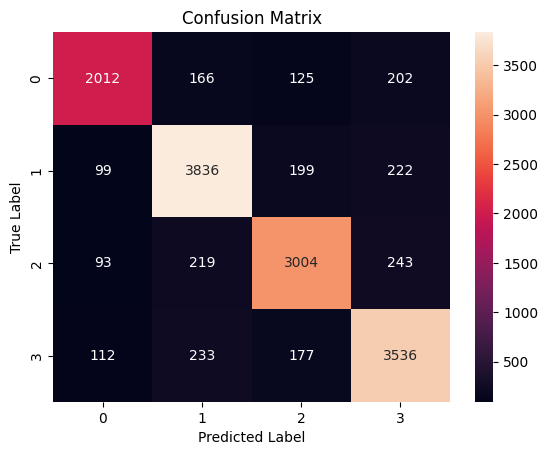

In [20]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# (Optional) Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [21]:
from google.colab import files

In [24]:
with open('lr_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [25]:
files.download('lr_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>